In [4]:
!pip install prophet



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [5]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Request

In [6]:
import requests
from datetime import datetime, timedelta
import json


symbol = 'BTCUSDT'
interval='1d'
data_count = str(1000)
url = 'https://api.binance.com/api/v3/klines?symbol=' + symbol + '&interval=' + interval + '&limit=' + data_count
# Récupérez les données de marché pour le Bitcoin sur Binance pour cette journée
response = requests.get(url)

# conversion des données de réponse JSON en liste de listes
data = json.loads(response.text)
print(data)
print(len(data))

[[1591488000000, '9666.85000000', '9802.00000000', '9372.46000000', '9746.99000000', '57952.84838500', 1591574399999, '556919603.79154480', 637766, '28426.59512900', '273242856.19134752', '0'], [1591574400000, '9746.99000000', '9800.00000000', '9633.00000000', '9782.01000000', '40664.66412500', 1591660799999, '395459395.82133724', 485139, '19744.03912400', '192037951.04548972', '0'], [1591660800000, '9782.00000000', '9877.00000000', '9570.00000000', '9772.43000000', '46024.00128900', 1591747199999, '447208895.83869834', 551863, '21901.19095000', '212965408.67782809', '0'], [1591747200000, '9772.44000000', '9992.72000000', '9704.18000000', '9885.00000000', '47130.76298200', 1591833599999, '462384305.35119935', 560909, '23128.16103200', '226982635.61915444', '0'], [1591833600000, '9885.22000000', '9964.00000000', '9113.00000000', '9280.40000000', '94418.98473000', 1591919999999, '902075648.54538493', 966502, '40972.06474900', '391689549.65796588', '0'], [1591920000000, '9278.88000000', '

## Data Preparation

In [7]:
import csv

filename = 'data.csv'
days = []
open_prices = []
closes_prices = []

for date in data:
    datetime_object = datetime.fromtimestamp(date[0] / 1000)
    
    day =  str(datetime_object.date())
    days.append(day)
    
    open_price = float(date[1])
    open_prices.append(open_price)

    close_price = float(date[4])
    closes_prices.append(close_price)

dict = {'Date': days, 'Open': open_prices, 'Close': closes_prices}  
       
df = pd.DataFrame(dict) 
    
df.to_csv('data.csv', index=False) 

print(f"{filename} created successfully.")


data.csv created successfully.


## Reading Data

In [8]:
#read dataset
df = pd.read_csv('data.csv')
df.head(10)

,Date,Open,Close
0,2020-06-07,9666.85,9746.99
1,2020-06-08,9746.99,9782.01
2,2020-06-09,9782.00,9772.43
3,2020-06-10,9772.44,9885.00
4,2020-06-11,9885.22,9280.40
5,2020-06-12,9278.88,9465.13
6,2020-06-13,9464.96,9473.34
7,2020-06-14,9473.34,9342.10
8,2020-06-15,9342.10,9426.02
9,2020-06-16,9426.05,9525.59


In [9]:
df.tail(10)

,Date,Open,Close
990,2023-02-22,24450.67,24182.21
991,2023-02-23,24182.21,23940.20
992,2023-02-24,23940.20,23185.29
993,2023-02-25,23184.04,23157.07
994,2023-02-26,23157.07,23554.85
995,2023-02-27,23554.85,23492.09
996,2023-02-28,23492.09,23141.57
997,2023-03-01,23141.57,23628.97
998,2023-03-02,23629.76,23465.32
999,2023-03-03,23465.32,22392.39


In [10]:
#get statistics
df.describe()

,Open,Close
count,1000.000000,1000.000000
mean,31677.825120,31690.673020
std,15792.476324,15779.990914
min,9012.000000,9012.000000
25%,18809.020000,18837.137500
50%,30306.575000,30306.585000
75%,44405.345000,44404.550000
max,67525.820000,67525.830000


In [11]:
#rename columns
prophet_df = df.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'Open', 'y'], dtype='object')

## Prophet Model

In [12]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

14:18:51 - cmdstanpy - INFO - Chain [1] start processing
14:18:51 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=100)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-06-07,16939.259610,8822.823207,15496.370781,16939.259610,16939.259610,-4847.819153,-4847.819153,-4847.819153,-9.299976,-9.299976,-9.299976,-4838.519176,-4838.519176,-4838.519176,0.0,0.0,0.0,12091.440458
1,2020-06-08,16939.299845,8607.242086,15392.585641,16939.299845,16939.299845,-4976.281313,-4976.281313,-4976.281313,17.322296,17.322296,17.322296,-4993.603609,-4993.603609,-4993.603609,0.0,0.0,0.0,11963.018532
2,2020-06-09,16939.340080,8710.294857,14879.112256,16939.340080,16939.340080,-5172.268962,-5172.268962,-5172.268962,-19.546895,-19.546895,-19.546895,-5152.722067,-5152.722067,-5152.722067,0.0,0.0,0.0,11767.071118
3,2020-06-10,16939.380315,8488.022268,14886.097043,16939.380315,16939.380315,-5236.260861,-5236.260861,-5236.260861,81.302128,81.302128,81.302128,-5317.562989,-5317.562989,-5317.562989,0.0,0.0,0.0,11703.119454
4,2020-06-11,16939.420550,8063.302547,14886.041109,16939.420550,16939.420550,-5525.887072,-5525.887072,-5525.887072,-36.451287,-36.451287,-36.451287,-5489.435785,-5489.435785,-5489.435785,0.0,0.0,0.0,11413.533478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2023-06-07,9593.782102,-3197.486097,14256.563992,1969.012954,18332.262529,-4642.336014,-4642.336014,-4642.336014,81.302128,81.302128,81.302128,-4723.638142,-4723.638142,-4723.638142,0.0,0.0,0.0,4951.446087
1096,2023-06-08,9532.808732,-3560.748028,14095.074869,1808.956701,18420.631214,-4913.469258,-4913.469258,-4913.469258,-36.451287,-36.451287,-36.451287,-4877.017971,-4877.017971,-4877.017971,0.0,0.0,0.0,4619.339474
1097,2023-06-09,9471.835363,-4115.529363,13612.781857,1614.435196,18532.127681,-5075.130970,-5075.130970,-5075.130970,-42.198147,-42.198147,-42.198147,-5032.932822,-5032.932822,-5032.932822,0.0,0.0,0.0,4396.704393
1098,2023-06-10,9410.861993,-4741.274584,14262.240566,1444.234303,18604.235035,-5184.466141,-5184.466141,-5184.466141,8.871882,8.871882,8.871882,-5193.338023,-5193.338023,-5193.338023,0.0,0.0,0.0,4226.395852


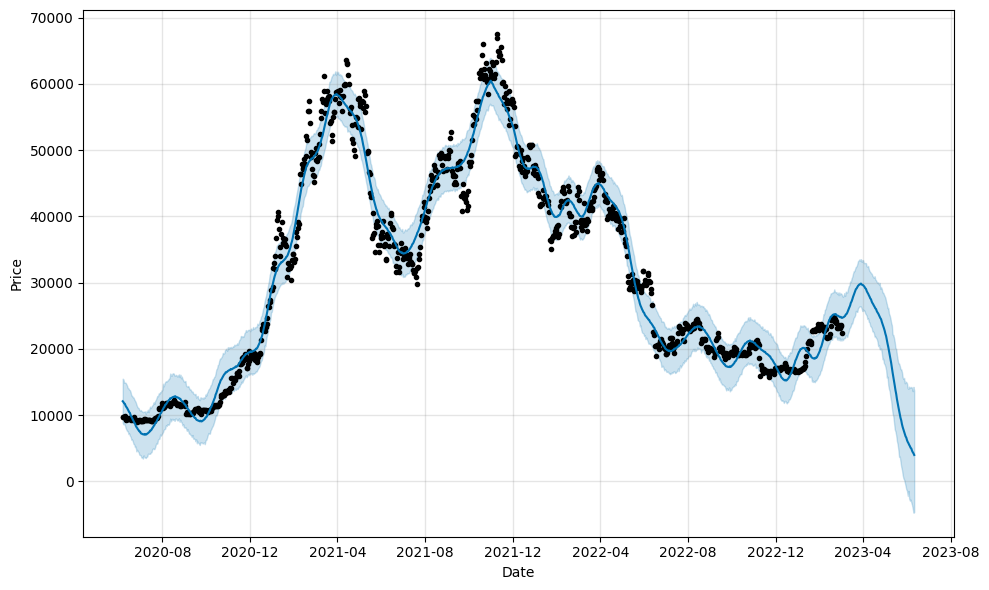

In [14]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [15]:
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

In [16]:
forecast.count()

ds                            1100
trend                         1100
yhat_lower                    1100
yhat_upper                    1100
trend_lower                   1100
trend_upper                   1100
additive_terms                1100
additive_terms_lower          1100
additive_terms_upper          1100
weekly                        1100
weekly_lower                  1100
weekly_upper                  1100
yearly                        1100
yearly_lower                  1100
yearly_upper                  1100
multiplicative_terms          1100
multiplicative_terms_lower    1100
multiplicative_terms_upper    1100
yhat                          1100
dtype: int64

## NeuralProphet

In [17]:
!pip install neuralprophet


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


## Data Preparation

In [18]:
data = prophet_df[['ds','y']][:940]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

            ds         y
0   2020-06-07   9746.99
1   2020-06-08   9782.01
2   2020-06-09   9772.43
3   2020-06-10   9885.00
4   2020-06-11   9280.40
..         ...       ...
935 2022-12-29  16633.47
936 2022-12-30  16607.48
937 2022-12-31  16542.40
938 2023-01-01  16616.75
939 2023-01-02  16672.87

[940 rows x 2 columns]


,ds,y
0,2020-06-07,9746.99
1,2020-06-08,9782.01
2,2020-06-09,9772.43
3,2020-06-10,9885.00
4,2020-06-11,9280.40


## Fit and predict

In [19]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=160)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.894% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (59) is too small than the required number for the learning rate finder (225). The results might not be optimal.


Finding best initial lr:   0%|          | 0/225 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.894% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.375% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-03,None,16483.746094,20969.304688,-4510.814453,25.257023
1,2023-01-04,None,16604.191406,20939.644531,-4393.391602,57.938591
2,2023-01-05,None,16611.117188,20909.980469,-4274.997559,-23.864998
3,2023-01-06,None,16665.154297,20880.324219,-4155.397461,-59.770725
4,2023-01-07,None,16795.392578,20850.660156,-4034.318359,-20.948793


In [20]:
train_predict = prophet_df[['ds','y']]
train_forecast = m.predict(train_predict)
print(train_predict)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.9% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


            ds         y
0   2020-06-07   9746.99
1   2020-06-08   9782.01
2   2020-06-09   9772.43
3   2020-06-10   9885.00
4   2020-06-11   9280.40
..         ...       ...
995 2023-02-27  23492.09
996 2023-02-28  23141.57
997 2023-03-01  23628.97
998 2023-03-02  23465.32
999 2023-03-03  22392.39

[1000 rows x 2 columns]


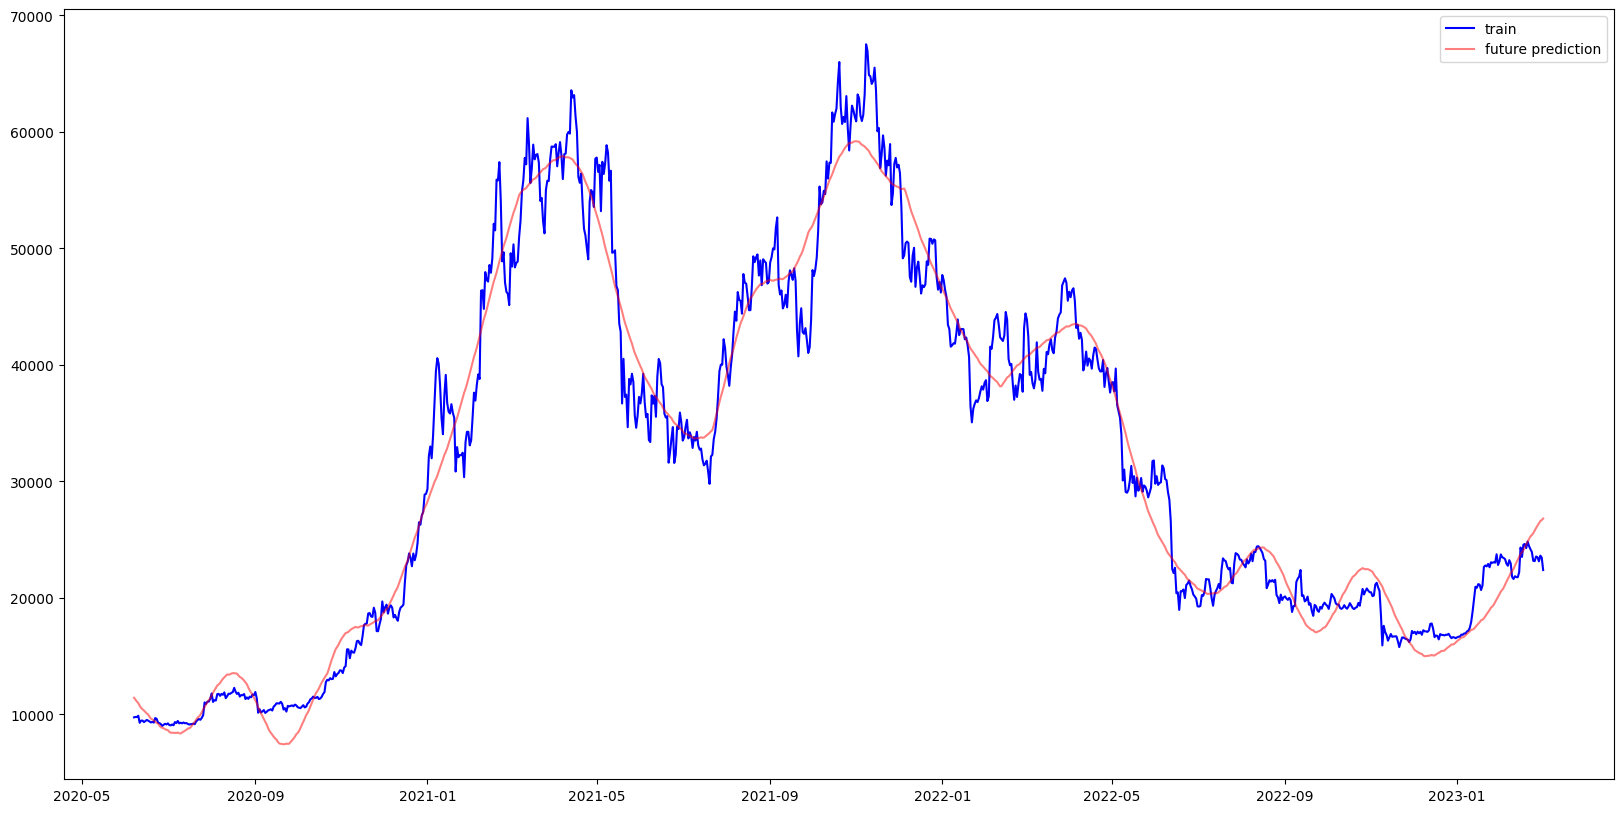

In [21]:
plt.figure(figsize=(20,10))
plt.plot(prophet_df['ds'], prophet_df['y'],color='blue', label="train")
plt.plot(train_forecast['ds'], train_forecast['yhat1'],color='red',alpha=0.5, label="future prediction")
plt.legend()
plt.show()

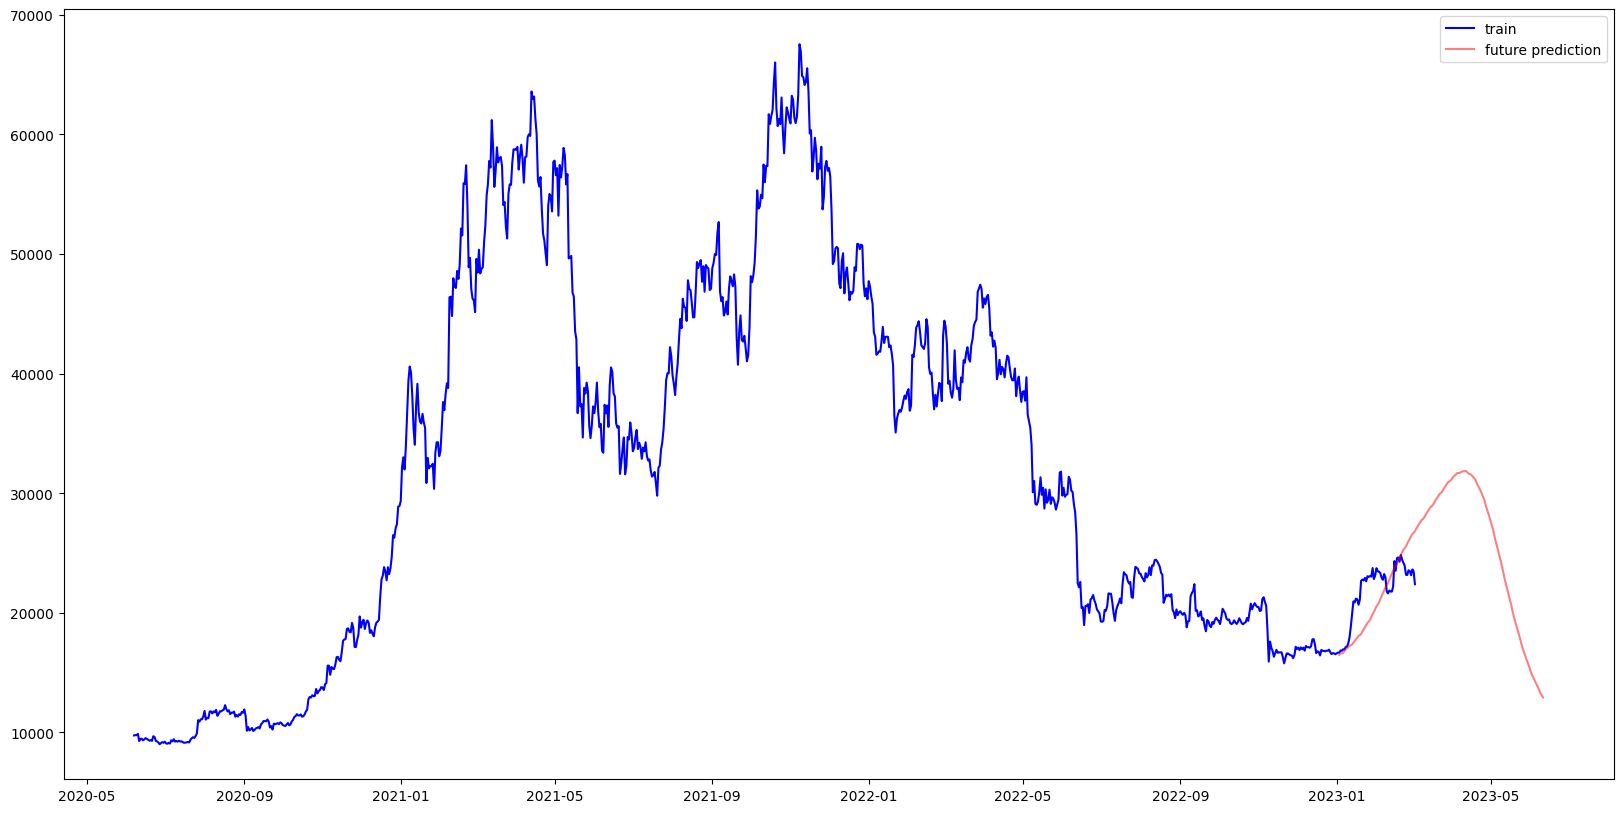

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


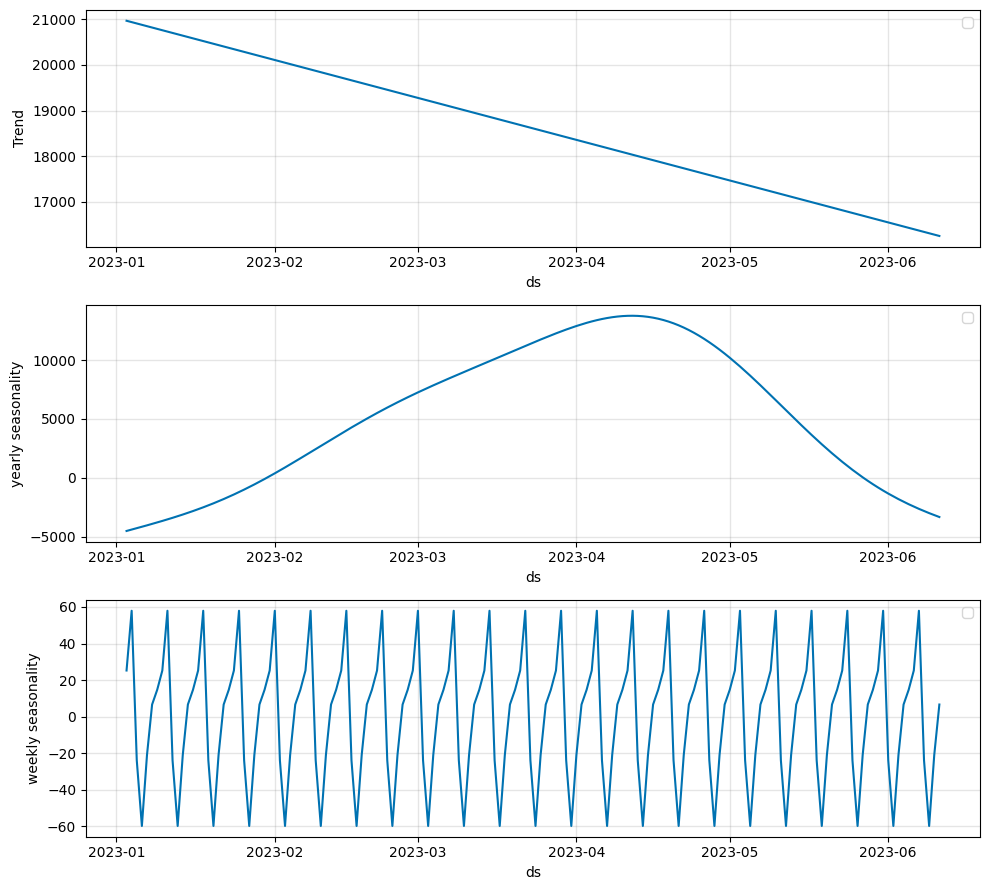

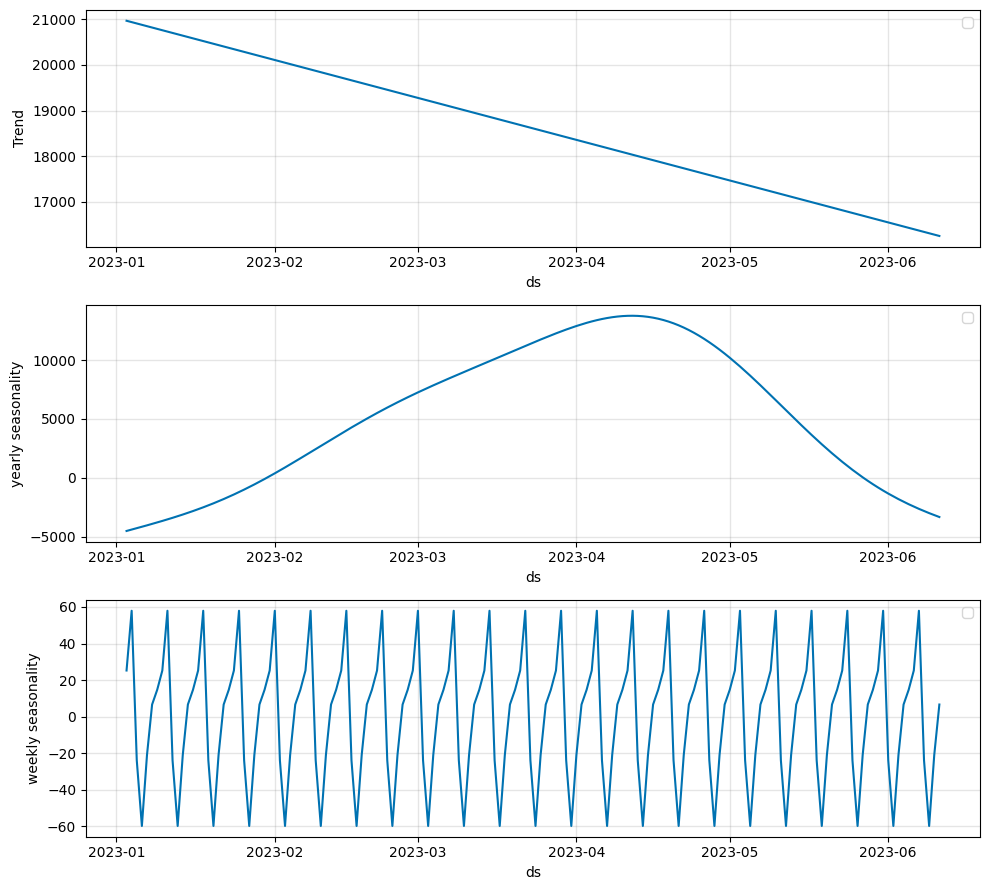

In [22]:
plt.figure(figsize=(20,10))
plt.plot(prophet_df['ds'], prophet_df['y'],color='blue', label="train")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="future prediction")
plt.legend()
plt.show()

m.plot_components(forecast)

In [23]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-01-03,None,16483.746094,20969.304688,-4510.814453,25.257023
1,2023-01-04,None,16604.191406,20939.644531,-4393.391602,57.938591
2,2023-01-05,None,16611.117188,20909.980469,-4274.997559,-23.864998
3,2023-01-06,None,16665.154297,20880.324219,-4155.397461,-59.770725
4,2023-01-07,None,16795.392578,20850.660156,-4034.318359,-20.948793
...,...,...,...,...,...,...
155,2023-06-07,None,13795.902344,16371.750000,-2633.786865,57.938591
156,2023-06-08,None,13499.980469,16342.089844,-2818.244141,-23.864998
157,2023-06-09,None,13257.749023,16312.427734,-2994.908203,-59.770725
158,2023-06-10,None,13097.504883,16282.767578,-3164.313721,-20.948793


In [24]:
prophet_df

,ds,Open,y
0,2020-06-07,9666.85,9746.99
1,2020-06-08,9746.99,9782.01
2,2020-06-09,9782.00,9772.43
3,2020-06-10,9772.44,9885.00
4,2020-06-11,9885.22,9280.40
...,...,...,...
995,2023-02-27,23554.85,23492.09
996,2023-02-28,23492.09,23141.57
997,2023-03-01,23141.57,23628.97
998,2023-03-02,23629.76,23465.32


In [25]:
train_forecast['true_y']=prophet_df[['y']].reset_index()['y']

In [26]:
train_forecast

,ds,y,yhat1,trend,season_yearly,season_weekly,true_y
0,2020-06-07,9746.99,11431.371094,14197.597656,-2772.881836,6.655409,9746.99
1,2020-06-08,9782.01,11263.206055,14199.916016,-2951.443115,14.733484,9782.01
2,2020-06-09,9772.43,11104.875977,14202.232422,-3122.613770,25.257023,9772.43
3,2020-06-10,9885.00,10975.565430,14204.550781,-3286.923828,57.938591,9885.00
4,2020-06-11,9280.40,10738.114258,14206.868164,-3444.888428,-23.864998,9280.40
...,...,...,...,...,...,...,...
995,2023-02-27,23492.09,26194.087891,19337.914062,6841.439941,14.733484,23492.09
996,2023-02-28,23141.57,26383.849609,19308.250000,7050.341797,25.257023,23141.57
997,2023-03-01,23628.97,26592.126953,19278.593750,7255.595703,57.938591,23628.97
998,2023-03-02,23465.32,26682.503906,19248.929688,7457.438965,-23.864998,23465.32


## Mean error

In [27]:
print(np.mean(np.abs(train_forecast['true_y']-train_forecast['yhat1'])))

2139.6094921289064


In [28]:
!pip install yfinance
import yfinance as yf  


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [36]:
# Get the data for the stock Apple by specifying the stock ticker, start date, and end date
data = yf.download(['BTC-USD', 'EURUSD=X', 'AAPL210115C00018750', 'CL=F', 'ARKK', '^TNX' ],'2013-01-03','2023-03-04')
data["Adj Close"].head()


[*********************100%***********************]  6 of 6 completed

1 Failed download:
- AAPL210115C00018750: No timezone found, symbol may be delisted


,AAPL210115C00018750,ARKK,BTC-USD,CL=F,EURUSD=X,^TNX
Date,,,,,,
2013-01-03 00:00:00,NaN,NaN,NaN,92.919998,1.318218,1.899
2013-01-04 00:00:00,NaN,NaN,NaN,93.089996,1.303271,1.915
2013-01-07 00:00:00,NaN,NaN,NaN,93.190002,1.306745,1.903
2013-01-08 00:00:00,NaN,NaN,NaN,93.150002,1.312508,1.871
2013-01-09 00:00:00,NaN,NaN,NaN,93.099998,1.308233,1.852


In [43]:
import requests

url = "https://api.blockchain.info/charts/market-price?timespan=all&format=json"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error:", response.status_code)

for val in data['values']:
    if val['y'] != 0:
        print(pd.to_datetime(str(val['x'])))

{'status': 'ok', 'name': 'Market Price (USD)', 'unit': 'USD', 'period': 'day', 'description': 'Average USD market price across major bitcoin exchanges.', 'values': [{'x': 1230940800, 'y': 0.0}, {'x': 1231200000, 'y': 0.0}, {'x': 1231459200, 'y': 0.0}, {'x': 1231718400, 'y': 0.0}, {'x': 1231977600, 'y': 0.0}, {'x': 1232236800, 'y': 0.0}, {'x': 1232496000, 'y': 0.0}, {'x': 1232755200, 'y': 0.0}, {'x': 1233014400, 'y': 0.0}, {'x': 1233273600, 'y': 0.0}, {'x': 1233532800, 'y': 0.0}, {'x': 1233792000, 'y': 0.0}, {'x': 1234051200, 'y': 0.0}, {'x': 1234310400, 'y': 0.0}, {'x': 1234569600, 'y': 0.0}, {'x': 1234828800, 'y': 0.0}, {'x': 1235088000, 'y': 0.0}, {'x': 1235347200, 'y': 0.0}, {'x': 1235606400, 'y': 0.0}, {'x': 1235865600, 'y': 0.0}, {'x': 1236124800, 'y': 0.0}, {'x': 1236384000, 'y': 0.0}, {'x': 1236643200, 'y': 0.0}, {'x': 1236902400, 'y': 0.0}, {'x': 1237161600, 'y': 0.0}, {'x': 1237420800, 'y': 0.0}, {'x': 1237680000, 'y': 0.0}, {'x': 1237939200, 'y': 0.0}, {'x': 1238198400, 'y': 

ParserError: year 1282262400 is out of range: 1282262400 present at position 0